<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capstone-Project-mlzoomcamp" data-toc-modified-id="Capstone-Project-mlzoomcamp-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Capstone Project mlzoomcamp</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Load-Data-and-data-exploration" data-toc-modified-id="Load-Data-and-data-exploration-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load Data and data exploration</a></span><ul class="toc-item"><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Checking-samples" data-toc-modified-id="Checking-samples-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Checking samples</a></span></li></ul></li></ul></li><li><span><a href="#CNN-Model-Architecture-and-Transfer-Learning" data-toc-modified-id="CNN-Model-Architecture-and-Transfer-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CNN Model Architecture and Transfer Learning</a></span><ul class="toc-item"><li><span><a href="#Creating-functions" data-toc-modified-id="Creating-functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Creating functions</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Tuning-hyperparameters-and-trying-various-models" data-toc-modified-id="Tuning-hyperparameters-and-trying-various-models-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Tuning hyperparameters and trying various models</a></span><ul class="toc-item"><li><span><a href="#Choosing-best-learning-rate-without-dropout" data-toc-modified-id="Choosing-best-learning-rate-without-dropout-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Choosing best learning rate without dropout</a></span></li><li><span><a href="#Choosing-best-droprate" data-toc-modified-id="Choosing-best-droprate-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Choosing best droprate</a></span></li></ul></li></ul></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final Model</a></span><ul class="toc-item"><li><span><a href="#Train-large-299x299-model" data-toc-modified-id="Train-large-299x299-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Train large 299x299 model</a></span></li></ul></li></ul></div>

# Capstone Project mlzoomcamp 

## Introduction

You can download the dataset from here

https://www.kaggle.com/datasets/vencerlanz09/shells-or-pebbles-an-image-classification-dataset


Have you ever been to the beach and found yourself wanting to collect either shells or pebbles, but not sure which was which? Or maybe you're in the oil and gas industry and need a quick and accurate way to classify different geological materials? Well, I have the solution for you!

Introducing the Shells or Pebbles dataset – a collection of images specifically designed for binary classification tasks. With this dataset, you'll be able to easily determine whether a certain image is a shell or a pebble.

But the usefulness of this dataset doesn't stop there. In the oil and gas industry, accurately identifying and classifying different materials, including rocks and shells, is crucial for exploration and production activities. By understanding the composition and structure of the earth's layers, geologists can make informed decisions about where to drill for oil and gas.

And for those concerned about the environment, this dataset can also be used to study the impacts of climate change on coastal ecosystems. By analyzing the distribution and abundance of shells and pebbles on beaches, scientists can gain valuable insights into the health of marine life and the effects of human activities.

So whether you're an artist looking to create a beach-themed project or a scientist studying the earth's geological makeup, the Shells or Pebbles dataset has something to offer. With its reliable and accurate classification capabilities, this dataset can help you make better informed decisions and better understand the world around you.

Written with help of #ChatGPT

# EDA

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing import image
from keras_preprocessing.image import load_img
from keras_preprocessing.image import ImageDataGenerator
from keras import backend as K
from tensorboard import notebook

from tensorflow.keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.models import Sequential
from keras.layers import Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

import tensorflow.keras.applications.xception as xc
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2


import time
from PIL import Image
from typing import List
import random
import plotly.express as px
import collections

tf.random.set_seed(0)
%matplotlib inline

In [2]:
tf.__version__

'2.9.2'

In [3]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Load Data and data exploration

In [7]:
train_dir = './data/train/'
# valid_dir = './data/test'

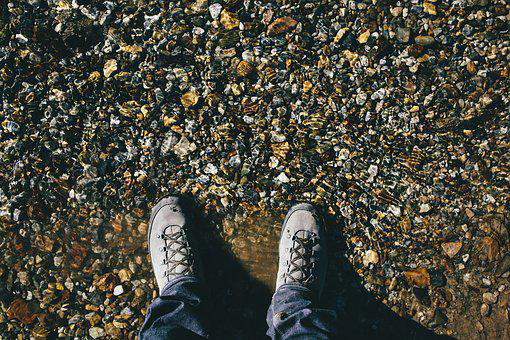

In [6]:
# Load an image for testing
path = './data/train/Pebbles'
name = 'Pebbles (10).jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [68]:
def plot_image_extension_frequency(path):
    # Initialize an empty list to store the extensions
    extensions = []

    # Iterate over the files and subfolders in the given path
    for root, dirs, files in os.walk(path):
        # Iterate over the files in the current folder
        for file in files:
            # Extract the extension of the file and add it to the list
            extension = os.path.splitext(file)[1][1:].lower()
            extensions.append(extension)

    # Count the frequency of each extension
    counter = collections.Counter(extensions)

    # Get the list of unique extensions
    unique_extensions = list(counter.keys())

    # Set the colors for the different extensions
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    # Plot the frequency of each extension using matplotlib
    for i, extension in enumerate(unique_extensions):
        plt.bar(extension, counter[extension], color=colors[i % len(colors)])
    plt.xlabel('Extension')
    plt.ylabel('Frequency')
    plt.title('Frequency of Image Extensions')
    plt.show()

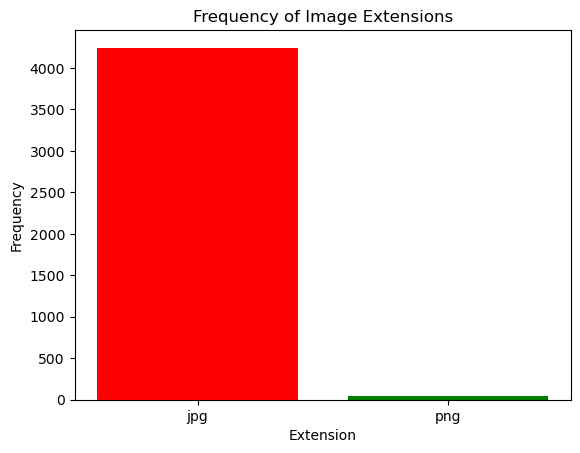

In [71]:
plot_image_extension_frequency(train_dir)

In [70]:
# The folder names are our Classes
class_names = sorted(os.listdir(train_dir))
n_classes = len(class_names)

print(f"Total Number of Classes : {n_classes}")
print(f"Classes : \n{class_names}")

Total Number of Classes : 2
Classes : 
['Pebbles', 'Shells']


In [9]:
import os

file_count = sum(len(files) for _, _, files in os.walk(train_dir))
print(file_count)

4284


In [10]:
train_class_dis = [len(os.listdir(train_dir + name)) for name in class_names]
train_class_dis

[2743, 1541]

In [11]:
fig = px.pie(names=class_names, values=train_class_dis)
fig.update_layout({'title': {'text': 'Class Distribution', 'x': 0.5}})
fig.show()

In [12]:
fig = px.bar(
    x=class_names,
    y=train_class_dis,
    title="Class Distribution",
)
fig.update_layout({'title': {'x': 0.5}})
fig.show()

The classes in the dataset are not much balanced, so it might cause problems during image classification. For example, if one class has significantly more examples than the other class, the classifier may end up being biased towards the more frequent class. This can lead to poor performance on the less frequent class.
There are a few ways to tackle class imbalance, for example use the method of oversampling the minority class.

However, here, I am not going to address this due to time limitation and proceed like it won't cause problems. Maybe in the future I will revisit this to learn how can I tackle such problems.

In [72]:
num_epochs = 100
img_input = 150

input_shape = (img_input, img_input, 3)

learning_rate = 0.1
size_inner = 64
droprate = 0.2

### Data preprocessing

In [34]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   validation_split=0.25,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_input,
                                                                 img_input),
                                                    batch_size=32,
                                                    subset='training',
                                                    class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.25)

validation_generator = val_datagen.flow_from_directory(train_dir,
                                                       target_size=(img_input,
                                                                    img_input),
                                                       batch_size=32,
                                                       subset='validation',
                                                       class_mode='binary')

Found 3214 images belonging to 2 classes.
Found 1070 images belonging to 2 classes.


### Checking samples

In [44]:
def plot_images(generator):
    # Set the figure size to be 10x10
    fig = plt.figure(figsize=(10, 10))

    # Get the first batch of images and labels from the generator
    images, labels = next(iter(generator))

    # Plot the first 9 images in the batch
    for i in range(9):
        # Create a subplot for the current image
        ax = fig.add_subplot(3, 3, i + 1)
        # Display the image
        plt.imshow(images[i])
        # Set the title of the subplot to be the class name
        if labels[i] == 0:
            plt.title("Pebbles")
        else:
            plt.title("Shells")
        # Turn off the axis labels
        plt.axis("off")

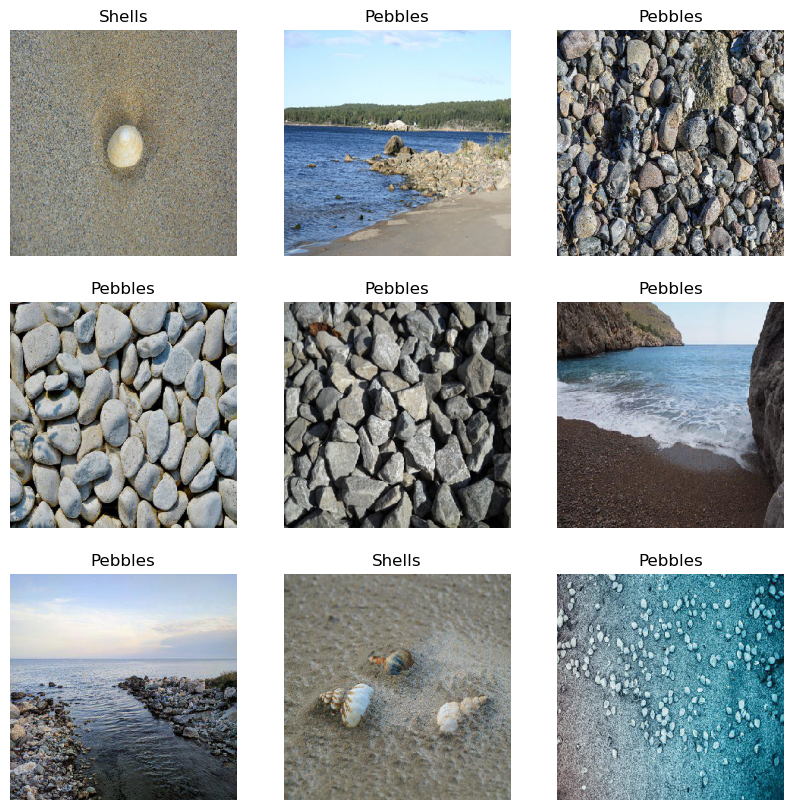

In [45]:
plot_images(train_generator)

For Data Augmentation we just horizontally flip the image. One can use other options.

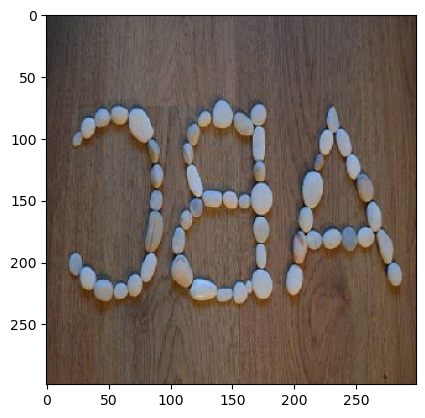

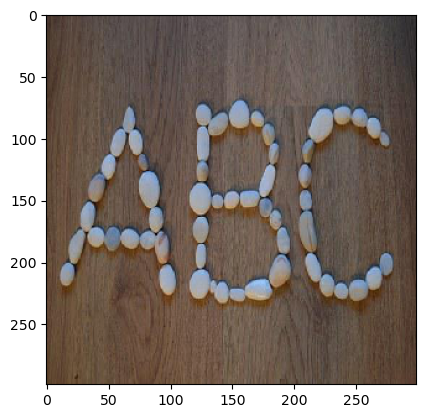

In [29]:
fnames = [
    os.path.join(train_dir + "/Pebbles", fname)
    for fname in os.listdir(train_dir + "/Pebbles")
]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(img_input, img_input))

x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape)

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0:
        break
plt.show()

# CNN Model Architecture and Transfer Learning


## Creating functions

In [ ]:
base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=input_shape)

In [16]:
def build_model(base_model, input_shape, droprate, learning_rate, size_inner,
                include_dropout):
    """
    Creates a model for image classification using a specified pre-trained model as a base model,
    with some additional inner layers and a final output layer.

    Parameters:
    - base_model: keras.Model
        The pre-trained model to use as the base model.
    - input_shape: tuple
        The shape of the input data (e.g. (150, 150, 3) for images with 150x150 resolution and 3 color channels).
    - learning_rate: float, optional
        The learning rate for the Adam optimizer.
    - size_inner: int, optional
        The number of units in the inner dense layer.
    - droprate: float, optional
        The dropout rate for the dropout layer.
    
    Returns:
    - model: keras.Model
        The compiled model.
    """

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=input_shape)

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    if include_dropout:
        drop = keras.layers.Dropout(droprate)(inner)
        outputs = keras.layers.Dense(1, activation='sigmoid')(drop)
    else:
        outputs = keras.layers.Dense(1, activation='sigmoid')(inner)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.BinaryCrossentropy()

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    print(learning_rate)
    model.summary()
    return model

In [17]:
def checkpoint_weights(
    model_name: str = 'model',
    checkpoint_dir: str = 'checkpoints',
    log_dir: str = 'log_dir',
    delete_files: bool = True,
    restore_from_checkpoint: bool = False,
    callbacks: List[tf.keras.callbacks.Callback] = None
) -> List[tf.keras.callbacks.Callback]:
    """

        Creates a ModelCheckpoint and EarlyStopping callback for use during model training.

        The ModelCheckpoint callback saves the best model weights to a file with a name that includes the epoch number
        and the validation accuracy. The EarlyStopping callback stops the training if the validation accuracy does not
        improve after two epochs.

        If the delete_files flag is set to True, this function will delete all files in the checkpoint_dir directory
        that contain model_name in their names. If delete_files is not set or is set to False, this function will
        append an underscore and a number to the end of model_name if there are any files in the checkpoint_dir
        directory that contain model_name in their names, where the number is equal to the number of files in the
        directory.
        
        If the restore_from_checkpoint flag is set to True, this function will find the latest checkpoint file in the
    checkpoint_dir directory and load the model weights from it.

        Args:
            model_name: str, the name of the model.
            checkpoint_dir: str, the directory where the checkpoints will be saved.
            log_dir: str, the directory where the TensorBoard logs will be saved.
            delete_files: bool, flag to indicate whether to delete existing checkpoints.
            restore_from_checkpoint: bool, flag to indicate whether to restore the model weights from a checkpoint file.
            callbacks: List[tf.keras.callbacks.Callback], a list of callbacks to use during training. If this parameter
                   is not provided, the function will create the ModelCheckpoint, EarlyStopping, and TensorBoard
                   callbacks.
    
    Returns:
        List[tf.keras.callbacks.Callback], a list containing the ModelCheckpoint, EarlyStopping, and TensorBoard
        callbacks.
    """

    if callbacks is None:
        # Check if the checkpoint_dir directory exists and create it if it does not
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)

        # Check if the log_dir directory exists and create it if it does not
        if not os.path.exists(log_dir):
            os.makedirs(log_dir)

        # If restore_from_checkpoint is True, find the latest checkpoint file in the checkpoint_dir directory
        # and load the model weights from it
        if restore_from_checkpoint:
            checkpoint_files = [
                f for f in os.listdir(checkpoint_dir) if model_name in f
            ]
            if checkpoint_files:
                latest_checkpoint = max(checkpoint_files, key=os.path.getctime)
                model.load_weights(
                    os.path.join(checkpoint_dir, latest_checkpoint))
        if delete_files:
            files = [f for f in os.listdir(checkpoint_dir) if model_name in f]
            for file in files:
                os.remove(os.path.join(checkpoint_dir, file))
        elif not delete_files:
            files = [f for f in os.listdir(checkpoint_dir) if model_name in f]
            if files:
                model_name = model_name + '_' + str(len(files))

        cp_callback = tf.keras.callbacks.ModelCheckpoint(
            os.path.join(
                checkpoint_dir,
                f'{model_name}-{{val_accuracy:.3f}}-{{epoch:02d}}.h5'),
            monitor='val_accuracy',
            save_best_only=True,
            mode='max')

        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy', patience=3, restore_best_weights=True)

        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

        callbacks = [cp_callback, early_stopping, tensorboard_callback]

    return callbacks

In [18]:
def train(rates, callbacks, epochs, input_shape, include_dropout):
    #########################################
    """
    Train and evaluate a model for multiple learning rates.
    
    Parameters:
    - learning_rates: list of float values
        List of learning rates to use for training the model.
    - checkpoint_weights: function
        Function to create a ModelCheckpoint callback for saving the model weights during training.
    - epochs: int
        Number of epochs to train the model.
    - input_shape: tuple
        Shape of the input data.
    - include_dropout: bool
        Indicates whether or not to include dropout layers in the model.
        
    Returns:
    - scores: dictionary
        Dictionary containing the training history for each learning rate. The keys of the dictionary are
        the learning rates and the values are the training history objects returned by the fit method.
    - model: tf.keras.Model
        Trained model with the best validation accuracy.
"""
    #########################################
    scores = {}

    # Compile model's training function into a static graph @tf.function
    def train_step(inputs, labels):
        """
        Perform a single training step.
        
        Parameters:
        - inputs: numpy array
            Input data for the training step.
        - labels: numpy array
            Labels for the input data.
        
        Returns:
        - loss_value: float
            The loss value resulting from the training step.
        """
        with tf.GradientTape() as tape:
            logits = model(inputs, training=True)
            loss_value = loss_fn(labels, logits)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        return loss_value

    for learning_rate in rates:
        for droprate in droprates:
            model = build_model(base_model, input_shape, droprate,
                                learning_rate, size_inner, include_dropout)

            # Use fit's steps_per_epoch argument to control the number of batches processed per epoch
            history = model.fit(train_generator,
                                epochs=num_epochs,
                                validation_data=validation_generator,
                                callbacks=callbacks,
                                steps_per_epoch=len(train_generator))
            hyperparameters = f'learning_rate={learning_rate}, droprate={droprate}'

            scores[hyperparameters] = history
    return scores, model

# Models

## Tuning hyperparameters and trying various models

### Choosing best learning rate without dropout

We run first for image size of 150x150

In [ ]:
num_epochs = 100
img_input = 150
size_inner = 64
input_shape = (img_input, img_input, 3)

In [ ]:
rates = [1e-5, 1e-4, 1e-3, 1e-2]

droprates = [0.0]
# Create a ReduceLROnPlateau callback
# lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

# Get the default callbacks from the checkpoint_weights function
callbacks = checkpoint_weights()

# Add the ReduceLROnPlateau callback to the list of callbacks
# callbacks.append(lr_callback)

scores, model = train(rates, callbacks, num_epochs, input_shape, False)

In [ ]:
def plot(history, label, max_epochs, fig_num):

    lr, droprate = label.split(', ')
    lr = float(lr.split('=')[1])
    droprate = float(droprate.split('=')[1])
    # Extract the history data
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create the plot for accuracy
    plt.subplot(2, 1, 1)
    #     plt.figure()
    plt.plot(accuracy, label=f'Training accuracy ({label})')
    plt.plot(val_accuracy, label=f'Validation accuracy ({label})')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.title(f'Training and Validation accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlim(0, max_epochs)
    plt.ylim(0, 1)
    plt.grid()
    # Save the figure to a file
    plt.savefig(f'accuracy_{fig_num}.png', bbox_inches='tight')

    # Clear the figure
    #     plt.clf()
    # Create the plot for loss
    plt.subplot(2, 1, 2)
    #     plt.figure()
    plt.plot(loss, label=f'Training Loss ({label})')
    plt.plot(val_loss, label=f'Validation Loss ({label})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title(f'Training and Validation Loss')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlim(0, max_epochs)
    plt.ylim(0, 1)
    plt.grid()
    
    # Save the figure to a file
    plt.savefig(f'loss_{fig_num}.png', bbox_inches='tight')


# Find the maximum number of epochs
max_epochs = max(
    len(history.history['accuracy']) for history in scores.values())

for i, (label, history) in enumerate(scores.items()):

    # Plot the data
    plot(history, label, max_epochs, i)

# Show the figure
plt.show()

We select learning_rate = 0.0001 as the best one

### Choosing best droprate

In [ ]:
rates = [0.0001]

droprates = [0.0, 0.2, 0.5, 0.8]

# Get the default callbacks from the checkpoint_weights function
callbacks = checkpoint_weights()

scores, model = train(rates, callbacks, num_epochs, input_shape, True)

In [ ]:
def plot(history, label, max_epochs, fig_num):

    lr, droprate = label.split(', ')
    lr = float(lr.split('=')[1])
    droprate = float(droprate.split('=')[1])
    # Extract the history data
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create the plot for accuracy
    plt.subplot(2, 1, 1)
    #     plt.figure()
    plt.plot(accuracy, label=f'Training accuracy ({label})')
    plt.plot(val_accuracy, label=f'Validation accuracy ({label})')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.title(f'Training and Validation accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlim(0, max_epochs)
    plt.ylim(0, 1)
    plt.grid()
    # Save the figure to a file
    plt.savefig(f'accuracy_{fig_num}.png', bbox_inches='tight')

    # Clear the figure
    #     plt.clf()
    # Create the plot for loss
    plt.subplot(2, 1, 2)
    #     plt.figure()
    plt.plot(loss, label=f'Training Loss ({label})')
    plt.plot(val_loss, label=f'Validation Loss ({label})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title(f'Training and Validation Loss')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlim(0, max_epochs)
    plt.ylim(0, 1)
    plt.grid()
    # Save the figure to a file
    plt.savefig(f'loss_{fig_num}.png', bbox_inches='tight')


# Find the maximum number of epochs
max_epochs = max(
    len(history.history['accuracy']) for history in scores.values())

for i, (label, history) in enumerate(scores.items()):

    # Plot the data
    plot(history, label, max_epochs, i)

# Show the figure
plt.show()

Let's select droprate = 0.2

# Final Model

## Train large 299x299 model

In [13]:
num_epochs = 100
img_input = 299

input_shape = (img_input, img_input, 3)

learning_rate = 0.0001
size_inner = 64
droprate = 0.2

In [14]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   validation_split=0.25,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_input,
                                                                 img_input),
                                                    batch_size=32,
                                                    subset='training',
                                                    class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.25)

validation_generator = val_datagen.flow_from_directory(train_dir,
                                                       target_size=(img_input,
                                                                    img_input),
                                                       batch_size=32,
                                                       subset='validation',
                                                       class_mode='binary')

Found 3214 images belonging to 2 classes.
Found 1070 images belonging to 2 classes.


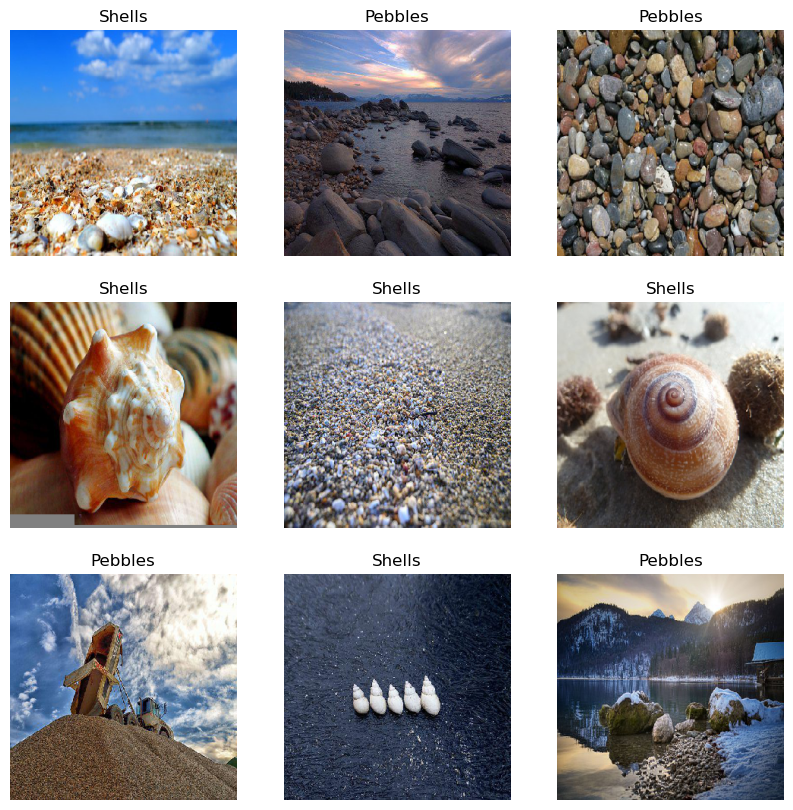

In [33]:
# Set the figure size to be 10x10
fig = plt.figure(figsize=(10, 10))

# Get the first batch of images and labels from the training generator
images, labels = next(iter(train_generator))

# Plot the first 9 images in the batch
for i in range(9):
    # Create a subplot for the current image
    ax = fig.add_subplot(3, 3, i + 1)
    # Display the image
    plt.imshow(images[i])
    # Set the title of the subplot to be the class name
    if labels[i] == 0:
        plt.title("Pebbles")
    else:
        plt.title("Shells")
    # Turn off the axis labels
    plt.axis("off")

In [15]:
base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=input_shape)

In [19]:
rates = [0.0001]

droprates = [0.2]

# Get the default callbacks from the checkpoint_weights function
callbacks = checkpoint_weights()

scores, model = train(rates, callbacks, num_epochs, input_shape, True)

0.0001
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                      

In [84]:
import matplotlib.gridspec as gridspec

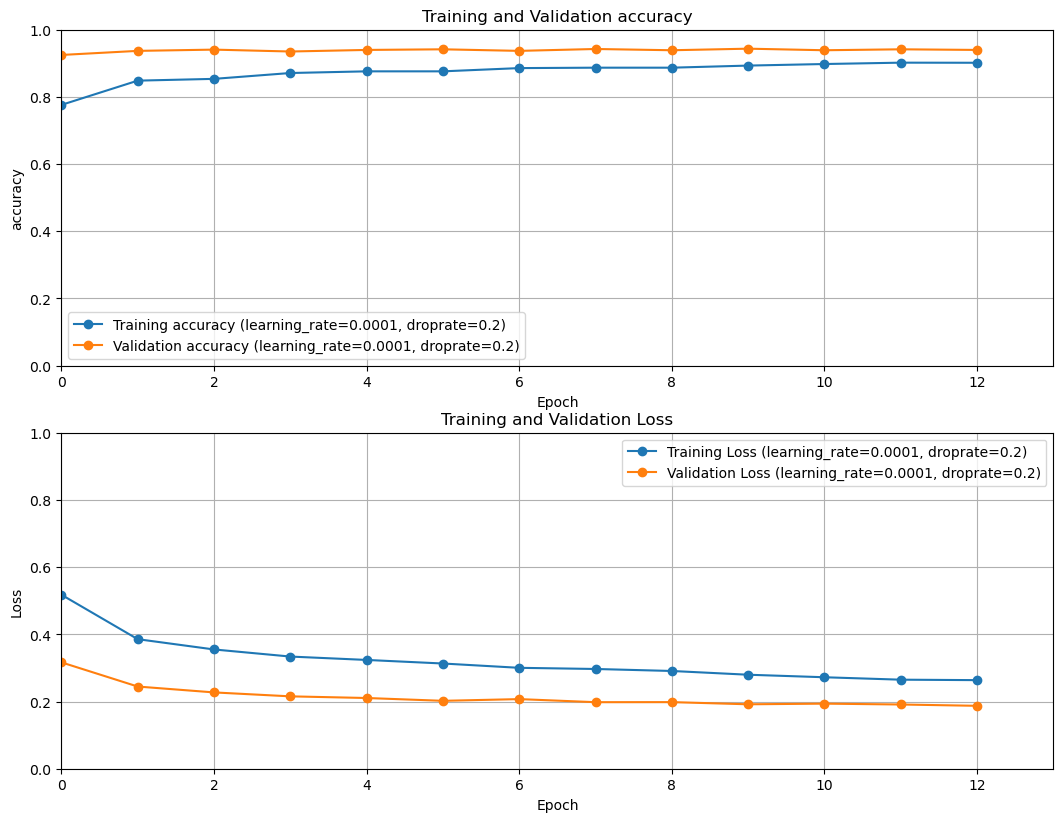

In [92]:
def plot(history, label, max_epochs, fig_num):

    lr, droprate = label.split(', ')
    lr = float(lr.split('=')[1])
    droprate = float(droprate.split('=')[1])
    # Extract the history data
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create the plot for accuracy
    plt.subplot(2, 1, 1)
    #     plt.figure()
    plt.plot(accuracy, '-o',label=f'Training accuracy ({label})')
    plt.plot(val_accuracy, '-o',label=f'Validation accuracy ({label})')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.title(f'Training and Validation accuracy')
    plt.legend()
    plt.xlim(0, max_epochs)
    plt.ylim(0, 1)
    plt.grid()
    # Save the figure to a file
    plt.savefig(f'accuracy_{fig_num}.png', bbox_inches='tight')

    # Clear the figure
    #     plt.clf()
    # Create the plot for loss
    plt.subplot(2, 1, 2)
    #     plt.figure()
    plt.plot(loss, '-o', label=f'Training Loss ({label})')
    plt.plot(val_loss, '-o', label=f'Validation Loss ({label})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title(f'Training and Validation Loss')
    plt.legend()
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlim(0, max_epochs)
    plt.ylim(0, 1)
    plt.grid()
    # Save the figure to a file
    plt.savefig(f'loss_{fig_num}.png', bbox_inches='tight')


# Get the current figure
fig = plt.gcf()

# Get the current figure's size in inches
size = fig.get_size_inches()

# Set the figure's size to be dynamic
fig.set_size_inches(size * 2)



# Find the maximum number of epochs
max_epochs = max(
    len(history.history['accuracy']) for history in scores.values())

for i, (label, history) in enumerate(scores.items()):

    # Plot the data
    plot(history, label, max_epochs, i)
    
# Show the figure
plt.show()